In [1]:
import sys
sys.path

['/Users/shaun/QUIC-Projects',
 '/',
 '/Users/shaun/QUIC-Projects/custom_qiskit',
 '/',
 '/Users/shaun/.vscode/extensions/ms-python.python-2020.8.106424/pythonFiles',
 '/Users/shaun/.vscode/extensions/ms-python.python-2020.8.106424/pythonFiles/lib/python',
 '/Users/shaun/anaconda3/lib/python38.zip',
 '/Users/shaun/anaconda3/lib/python3.8',
 '/Users/shaun/anaconda3/lib/python3.8/lib-dynload',
 '',
 '/Users/shaun/anaconda3/lib/python3.8/site-packages',
 '/Users/shaun/anaconda3/lib/python3.8/site-packages/aeosa',
 '/Users/shaun/anaconda3/lib/python3.8/site-packages/IPython/extensions',
 '/Users/shaun/.ipython']

In [1]:
from qiskit import QuantumCircuit

In [3]:
qc = QuantumCircuit(2)
qc.initialize([0,1,0,0], [0,1])

In [35]:
import numpy as np
a = [[2, 3], [3, 4], [5,6]]
np.size(a, 0)

3

In [77]:
from quantumdatabase.QDB import *
from qiskit import QuantumCircuit
qc = QuantumCircuit(1)
qc.qdb([1, 1], [0])
qc.draw()

┌──────────────────────┐
q_0: ┤ QDB(0.70711,0.70711) ├
     └──────────────────────┘

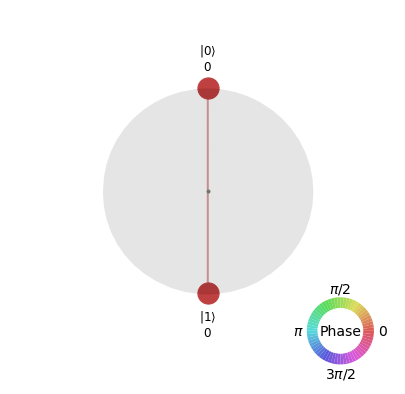

In [78]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_qsphere

state = Statevector.from_instruction(qc)
plot_state_qsphere(state, show_state_phases=True)

In [79]:
qc.to_instruction().control()

AttributeError: 'Instruction' object has no attribute 'control'

In [1]:
# import qiskit.extensions as c
n = 4
import quantumdatabase.QDB as c
import numpy as np
from qiskit import QuantumCircuit
x = np.random.rand(2**n)+1j*np.random.rand(2**n)
x = x/np.linalg.norm(x)
a = c.Initialize(x).definition.to_gate().control(2, ctrl_state='10')
qc = QuantumCircuit(n+2)
qc.ry(np.pi/np.random.rand(1),0)
qc.rx(np.pi/np.random.rand(1),1)
qc.append(a, range(n+2))
#state = Statevector.from_instruction(qc.decompose())
#plot_state_qsphere(state)
qc.draw('mpl')

c.Initialize(x).definition.draw('mpl')

QiskitError: 'One or more instructions cannot be converted to a gate. "disentangler_dg" is not a gate instruction'